# Sample Reconstruction Using Sinc(t) to Interpolate

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material


Running Python: 3.12.6
Running Sympy: 1.13.2


## Create sampled signal

In [2]:
fs = 10              # samping freq
Ts = 1/fs                
Tf = 2               # time period of which samples are taken
t_discrete = np.arange(-Tf,Tf-(1/fs/10),1/fs) # make a time vector 
t_cts = np.arange(-2*Tf,2*Tf-(1/1000/10),1/1000) # make a time vector 

xs = np.sin(2*np.pi*1*t_discrete)    # sampled signal
x = np.sin(2*np.pi*1*t_cts)    # actual signal

k = np.arange(len(xs)) - len(xs)//2  # counting index

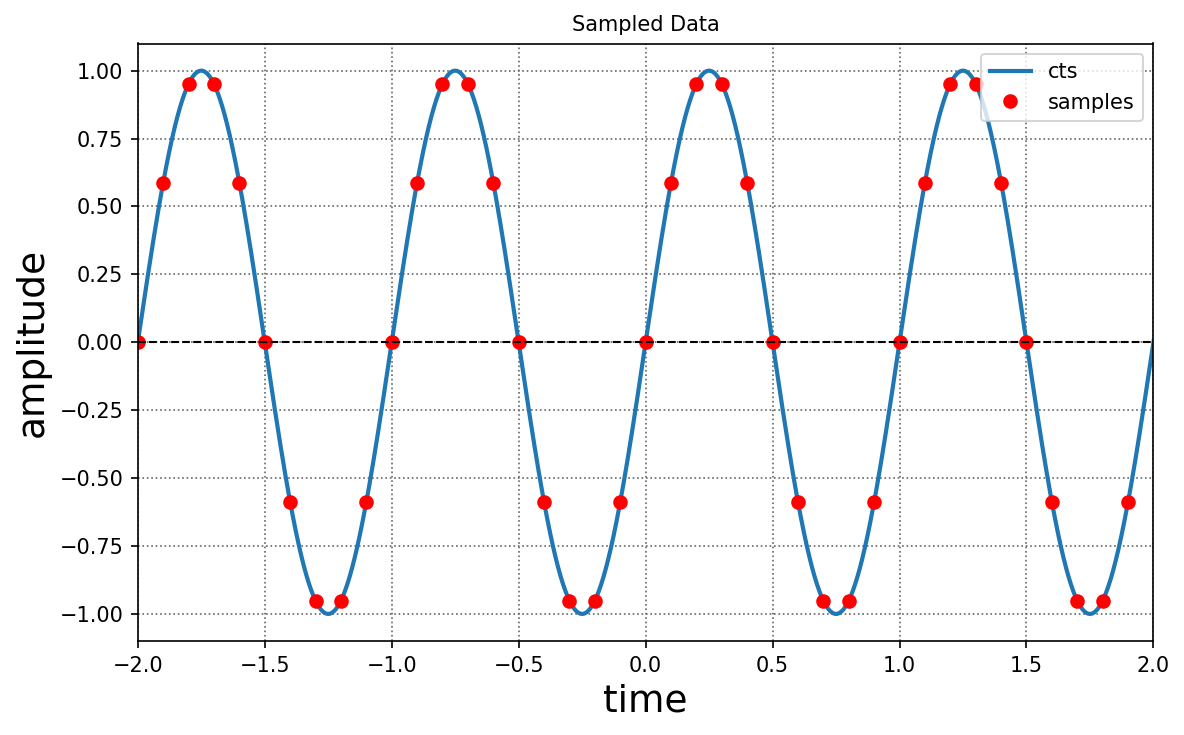

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=150)
ax.plot(t_cts,x,label='cts')
ax.plot(t_discrete,xs,'ro',label='samples')
ax.set_xlim([-Tf, Tf])
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Sampled Data')
nicegrid()
plt.legend(loc=1)
fig.savefig('./figs/T9_ex3_1.png', dpi=300)
plt.show()

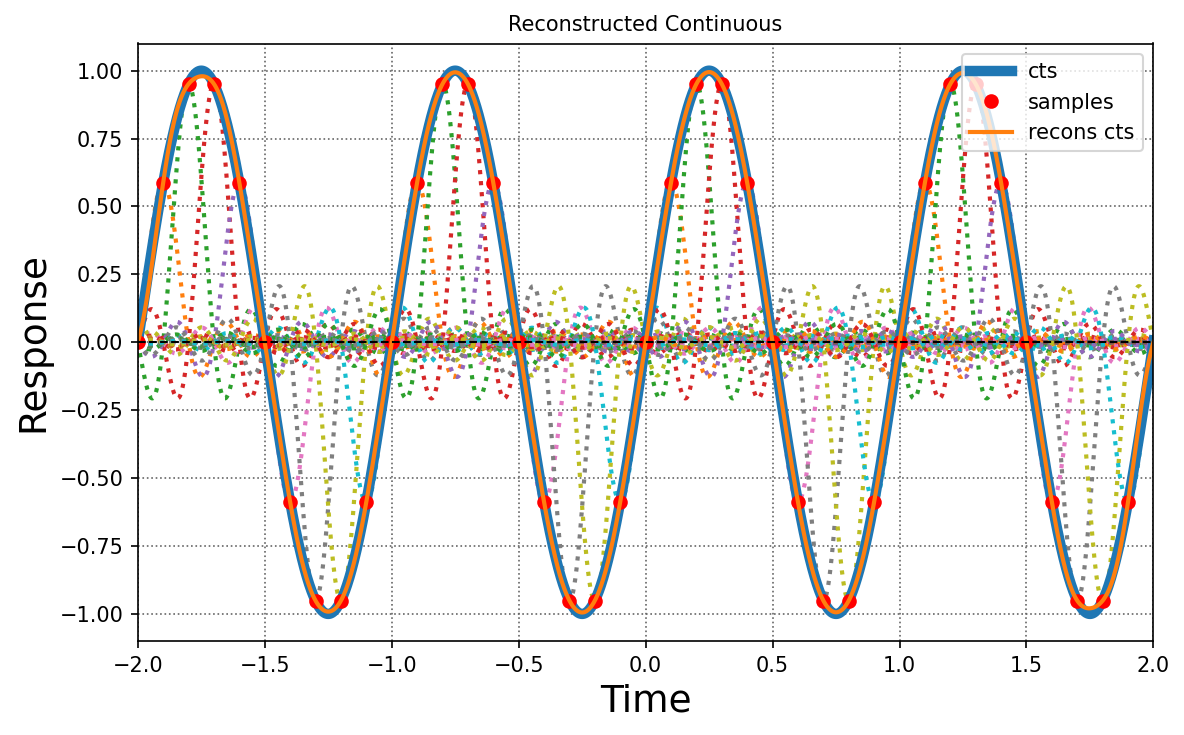

In [4]:
fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=150)

X = t_cts*0
for jj,val in enumerate(xs):
    interp = val*np.sinc((t_cts/Ts-k[jj]))
    plt.plot(t_cts,interp,':')
    X += interp 

ax.plot(t_cts,x,label='cts',lw=5)
ax.plot(t_discrete,xs,'ro',label='samples')
ax.plot(t_cts,X,label='recons cts')
ax.set_xlim([-Tf, Tf])
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Response',fontsize=18)
plt.title('Reconstructed Continuous')
nicegrid()
plt.legend(loc=1)
fig.savefig('./figs/T9_ex3_2.png', dpi=300)
plt.show()

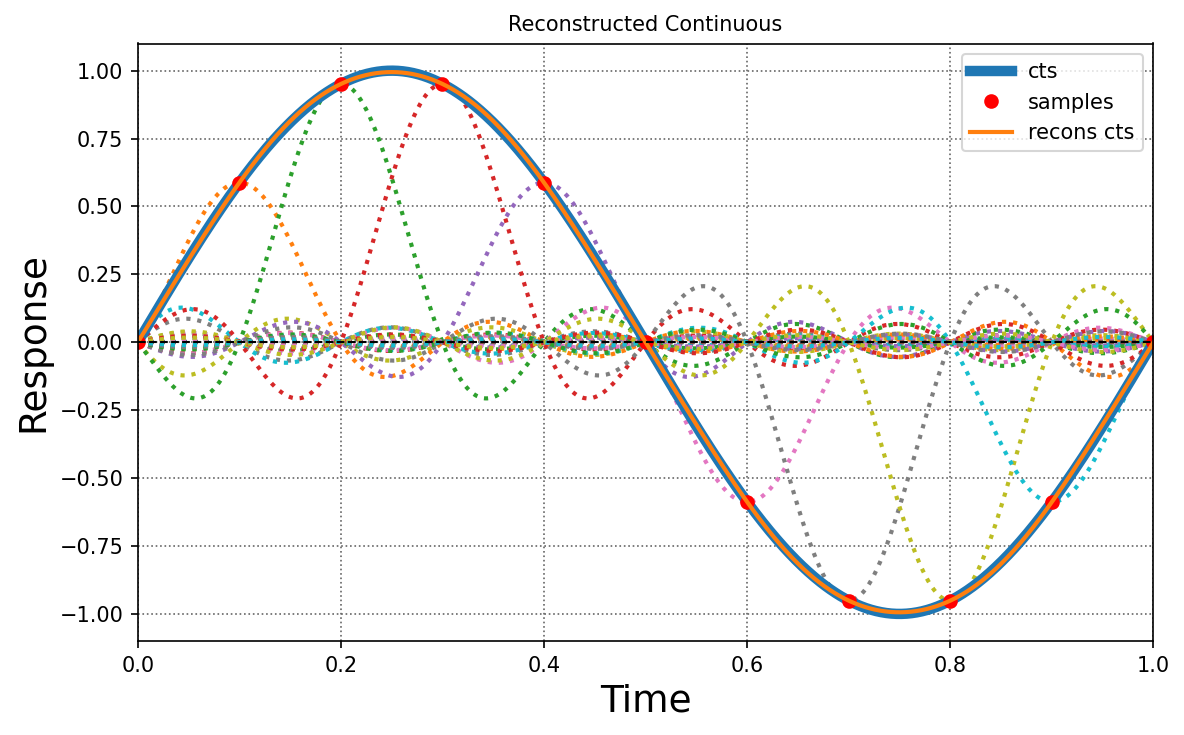

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=150)

X = t_cts*0
for jj,val in enumerate(xs):
    interp = val*np.sinc((t_cts/Ts-k[jj]))
    plt.plot(t_cts,interp,':')
    X += interp 

ax.plot(t_cts,x,label='cts',lw=5)
ax.plot(t_discrete,xs,'ro',label='samples')
ax.plot(t_cts,X,label='recons cts')
ax.set_xlim([0, Tf/2])
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Response',fontsize=18)
plt.title('Reconstructed Continuous')
nicegrid()
plt.legend(loc=1)
fig.savefig('./figs/T9_ex3_2a.png', dpi=300)
plt.show()